In [52]:
import tensorflow as tf
import scipy.misc
import argparse
import os
import numpy as np
from glob import glob
from model import inpaint_model
import random
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [53]:
def gen_mask(maskType):
    
    print("generating {} mask".format(maskType))

    dim = 64
    
    if maskType == 'center':
        mask = np.ones([dim, dim])
        boarder = int(dim*0.25)
        mask[boarder: dim-boarder, boarder: dim-boarder] = 0
    
    elif maskType == 'pattern':
        mask = np.ones([dim, dim])

        for i in range(64):
            mask[(i-20)**2:, i] = 0
        for i in range(64):
            mask[i, (i-20)**2:] = 0

    elif maskType == 'random':
        mask = np.ones([dim, dim])

        y_coor = np.random.choice(dim, dim*2)
        x_coor = np.random.choice(dim, dim*2)
        mask[x_coor, y_coor] = 0

    elif maskType == 'half':
        ori = random.randint(1, 4)
        mask = np.ones([dim, dim])

        if ori==1:
            mask[:, :dim // 2] = 0
        elif ori ==2 :
            mask[:, dim // 2:] = 0
        elif ori == 3:
            mask[:dim // 2, :] = 0
        else:
            mask[dim // 2:, :] = 0

    return mask

generating center mask
9 images found
iteration: 0, loss: 4874.41064453125
iteration: 1, loss: 3765.743408203125
iteration: 2, loss: 3082.314208984375
iteration: 3, loss: 2768.9951171875
iteration: 4, loss: 2696.5966796875
iteration: 5, loss: 2788.003173828125
iteration: 6, loss: 2669.25390625
iteration: 7, loss: 2569.865234375
iteration: 8, loss: 2612.90185546875
iteration: 9, loss: 2742.3193359375


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

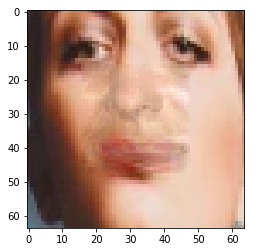

In [70]:
m = inpaint_model('model/graph.pb')
input_dir = 'testimages'
out_dir = 'completions'
masktype = 'center'

with tf.Session(graph=m.graph) as sess:   
    imout = sess.run(m.g_output, feed_dict={m.g_input: m.z})

mask = gen_mask(masktype)
plt.imshow(mask, cmap='gray')

imgfilenames = glob(input_dir + '/*.png')
print('{} images found'.format(len(imgfilenames)))
in_img = np.array([scipy.misc.imread(f, mode='RGB').astype(np.float) for f in imgfilenames]) / 128-1


inpaint_out, _ = m.inpaint(in_img, mask)

for image in inpaint_out:
    plt.imshow(image)
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


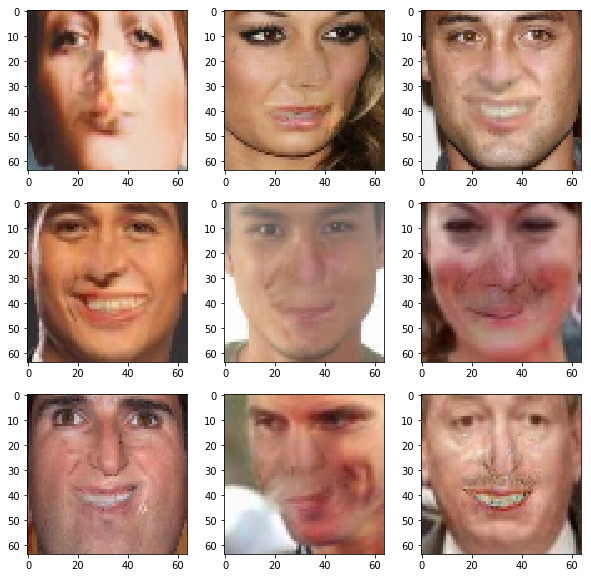

In [74]:
#%%capture --no-display

#print (inpaint_out.shape)
_, axarr = plt.subplots(3, 3, figsize=(10,10))
for i in np.arange(3):
    for j in np.arange(3):
        x = inpaint_out[3*i+j, :, :, :]
        axarr[i][j].imshow(x)
        
plt.show()

TypeError: Invalid dimensions for image data

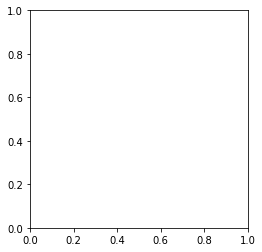

In [62]:
m = inpaint_model('model/graph.pb')
input_dir = 'testimages'
out_dir = 'completions'
masktype = 'center'

with tf.Session(graph=m.graph) as sess:   
    imout = sess.run(m.g_output, feed_dict={m.g_input: m.z})

mask = gen_mask(masktype)
plt.imshow(mask, cmap='gray')

imgfilenames = glob(input_dir + '/*.png')
print('{} images found'.format(len(imgfilenames)))
in_img = np.array([scipy.misc.imread(f, mode='RGB').astype(np.float) for f in imgfilenames]) / 128-1
inpaint_out = m.inpaint(in_img, mask)

plt.imshow(inpaint_out[i, :, :, :])